<a href="https://colab.research.google.com/github/marianasmoura/tecnicas-de-otimizacao/blob/main/Otimizacao_irrestrita_Fibonacci_monovariavel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNIVERSIDADE FEDERAL DO PIAUÍ

CURSO DE GRADUAÇÃO EM ENGENHARIA ELÉTRICA

DISCIPLINA: TÉCNICAS DE OTIMIZAÇÃO

DOCENTE: ALDIR SILVA SOUSA

DISCENTE: MARIANA DE SOUSA MOURA


---
Atividade 1: Otimização Irrestrita pelo Método de  Fibonacci


**A classe Parametros**

Esta classe tem por finalidade enviar em uma única variável, todos os parâmetros necessários para executar o método. 


Para o método Fibonacci, precisamos da função que se deseja minimizar, o intervalo de incerteza inicial e a tolerância requerida.



In [ ]:
class Parametros:
  def __init__(self,f,a,b,eps):
    self.f = f
    self.a = a
    self.b = b
    self.eps = eps

In [ ]:
F = dict()
def fibonacci(n):    
    if (n == 1): return 1
    if (n == 0): return 0
    if (n in F): return F[n]
    F[n] = fibonacci(n-1)+fibonacci(n-2)
    return F[n]

def FnMaiorDoQue(valor):
    n = 0
    F = fibonacci(n)
    while (F < valor):
       n = n+1
       F = fibonacci(n)
    return n,F

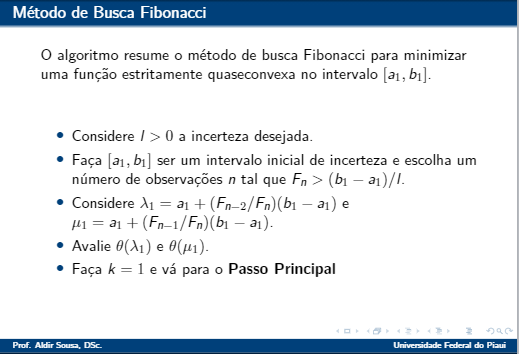



**Passo Principal**

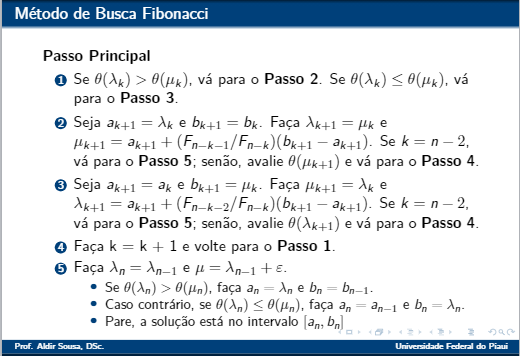

In [ ]:
import math
import pandas as pd

cols = ['a','b','lambda','mi','f(lambda)','f(mi)']    
def metodo_fibonacci(p):    
    l = p.eps
    a = p.a
    b = p.b
    n = 0
    M = (b-a)/l

    #Definindo o número de iterações
    n = FnMaiorDoQue(M)[0]

    
    y = a + ( fibonacci(n-2)/fibonacci(n) )*(b-a)
    m = a + ( fibonacci(n-1)/fibonacci(n) )*(b-a)
    y = round(y,6)  #Para usar somente 6 casas decimais. 
    m = round(m,6)   #Para usar somente 6 casas decimais.

    
    df = pd.DataFrame([[a,b,y,m,p.f(y),p.f(m)]], columns=cols)
    k = 0
    while (k < n):
         fy = p.f(y)
         fm = p.f(m)
         passo5=False
         if (fy > fm):
            #Passo 2
            a = y
            y = m
            m = a + (fibonacci(n-k-1)/fibonacci(n-k))*(b-a)
            m = round(m,6) #Para usar somente 6 casas decimais. 
            if (k == n-2): 
                passo5=True
         else: #Passo 3
            b = m
            m = y
            y = a + (fibonacci(n-k-2)/fibonacci(n-k))*(b-a)
            y = round(y,6)
            if (k == n-2): 
                passo5=True
         if (passo5):
           break     
         k = k + 1
         #res[k] = [a,b,y,m,p.f(y),p.f(m)]
         row = pd.DataFrame([[a,b,y,m,p.f(y),p.f(m)]],columns=cols)
         df = df.append(row, ignore_index=True)
         
    return df  


**Exercícios**

**1)** Resolva

min $x^2 -cos(x) + e ^{-2x}$

sujeito a:  $~-1\leq x \leq 1$





In [ ]:
import math
import numpy as np

def f3(x):
   return x*x - math.cos(x) + math.exp(-2*x)

a = -1
b = 1
eps = 1e-3
params = Parametros(f3,a,b,eps)
metodo_fibonacci(params)

,a,b,lambda,mi,f(lambda),f(mi)
0,-1.000000,1.000000,-0.236068,0.236068,0.686878,-0.292868
1,-0.236068,1.000000,0.236068,0.527864,-0.292868,-0.237305
2,-0.236068,0.527864,0.055728,0.236068,-0.100811,-0.292868
3,0.055728,0.527864,0.236068,0.347524,-0.292868,-0.320395
4,0.236068,0.527864,0.347524,0.416407,-0.320395,-0.306329
5,0.236068,0.416407,0.304951,0.347524,-0.317462,-0.320395
6,0.304951,0.416407,0.347524,0.373834,-0.320395,-0.317713
7,0.304951,0.373834,0.331260,0.347524,-0.320350,-0.320395
8,0.331260,0.373834,0.347524,0.357570,-0.320395,-0.319770
9,0.331260,0.357570,0.341306,0.347524,-0.320533,-0.320395


**2)** A localização do centróide de um setor circular
>  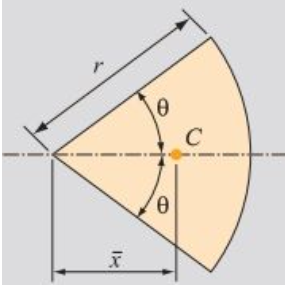

é dada por:

$\overline{x}  = \frac{2r \sin(\theta)}{3\theta}$ 


Determine o ângulo $\theta$ para o qual x = r/2.



In [ ]:
# x' = 2rsen(teta)/3teta
# x'= r/2 = 2rsen(teta)/3teta
#  3teta - 4sen(teta) = 0
# (3teta - 4sen(teta))^2 = 0 

import math
import numpy as np

def f5(teta):
   return (3*teta -4*math.sin(teta))**2

a = 0    # menor valor do ângulo teta
b = 90  # maior valor do ângulo teta
a = (a*math.pi)/180
b = (b*math.pi)/180
r = 1 # O valor de fxmedio independe do valor de r
eps = 1e-3
params = Parametros(f5,a,b,eps)
metodo_fibonacci(params)

,a,b,lambda,mi,f(lambda),f(mi)
0,0.000000,1.570796,0.599991,0.970805,2.102839e-01,1.512798e-01
1,0.599991,1.570796,0.970805,1.199982,1.512798e-01,1.643120e-02
2,0.970805,1.570796,1.199982,1.341620,1.643120e-02,1.675591e-02
3,0.970805,1.341620,1.112444,1.199982,6.239956e-02,1.643120e-02
4,1.112444,1.341620,1.199982,1.254083,1.643120e-02,1.506035e-03
5,1.199982,1.341620,1.254083,1.287518,1.506035e-03,4.829813e-04
6,1.254083,1.341620,1.287518,1.308186,4.829813e-04,3.806336e-03
7,1.254083,1.308186,1.274752,1.287518,3.013602e-06,4.829813e-04
8,1.254083,1.287518,1.266849,1.274752,2.593111e-04,3.013602e-06
9,1.266849,1.287518,1.274752,1.279615,3.013602e-06,5.217728e-05


**3)** Metodologia do Financiamento com Prestações Fixas​. Cálculo com juros compostos e capitalização mensal.

$q_0 = \frac{1-(1+j)^{-n}}{j}p$

Onde:

* n = Número de meses
* j= taxa de juros mensal
* p  = valor da prestação
* q0 = valor financiado.

Fonte: BC.

Maria pretende comprar um automóvel que custa R$\$~80.000$. Para tanto, ela dispõe de no máximo R$\$ ~20.000$ para dar de entrada e o restante seria financiado. O banco de Maria está propondo que essa dê a entrada de R$\$~ 20.000$ e divida o restante em 36x de R$\$ ~2.300$. Qual é a taxa de juros mensal desta operação proposta pelo banco?

In [ ]:
# q0 = (1-(1+j)**(-n))*p/j
# q0 - (1-(1+j)**(-n))*p/j = 0
# z = q0 - (1-(1+j)**(-n))*p/j 
# z = q0*j - (1-(1+j)**(-n))*p 
# z = (q0*j - (1-(1+j)**(-n))*p )**2

import math
import numpy as np 

def f4(j):
  return (q0*j - (1-(1+j)**(-n))*p)**2

a = 0    
b = 1  
n = 36
p = 2300
q0 = 60000
eps = 1e-3
params = Parametros(f4,a,b,eps)
metodo_fibonacci(params)

,a,b,lambda,mi,f(lambda),f(mi)
0,0.000000,1.000000,0.381966,0.618034,4.251011e+08,1.209790e+09
1,0.000000,0.618034,0.236068,0.381966,1.407829e+08,4.251011e+08
2,0.000000,0.381966,0.145898,0.236068,4.187332e+07,1.407829e+08
3,0.000000,0.236068,0.090170,0.145898,1.032328e+07,4.187332e+07
4,0.000000,0.145898,0.055728,0.090170,1.877334e+06,1.032328e+07
5,0.000000,0.090170,0.034443,0.055728,1.991298e+05,1.877334e+06
6,0.000000,0.055728,0.021285,0.034443,2.986646e+03,1.991298e+05
7,0.000000,0.034443,0.013158,0.021285,5.457534e+03,2.986646e+03
8,0.013158,0.034443,0.021285,0.026316,2.986646e+03,3.304932e+04
9,0.013158,0.026316,0.018189,0.021285,4.432101e+01,2.986646e+03
